<a href="https://colab.research.google.com/github/Razan-SM2/PicLingo/blob/main/SD_v1_5_model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.4 MB/s eta 0:00:00


In [ ]:
!pip install torch

**stable-diffusion-v1-5 model**

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")



In [ ]:
prompts =['a colorful motorcycle sitting next to a fence ', 'A kitchen filled with wooden cabinets and a microwave oven.', 'a skateboarder in a blue jacket is doing a trick', 'A street area with a building and cars.', 'A little girl sitting on top of a bed next to a lamp.', 'This highway is empty this early on the morning,', 'A man sitting in front of a plate of food.', 'Two men sell ties at an outdoor market.', 'A baseball player is winding up for the pitch.', 'Several motor scooters are jammed into a small market street.', 'A man using his laptop computer while a cat sits on his lap.', 'A man riding a skateboard over a rope.', 'a boat filled with people going down a river', 'A little baby is getting a haircut in a pink chair.', 'A cat lying down in a sink in a bathroom.', 'Closeup of a cellphone device with various buttons.' ]

images = pipeline(prompts, num_images_per_prompt=1 , output_type="np").images

  0%|          | 0/50 [00:00<?, ?it/s]

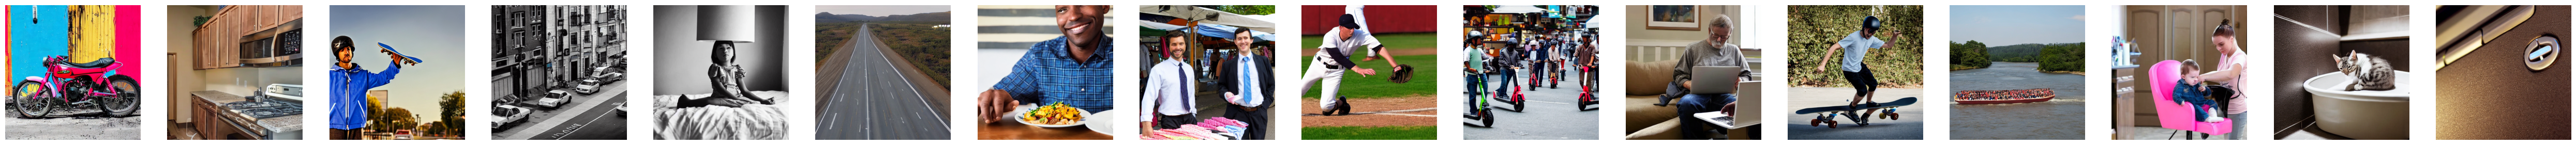

In [ ]:
import matplotlib.pyplot as plt
import os

folder = 'SD-v1-5_model_images2'
os.makedirs(folder, exist_ok=True)

num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 4, 4))

for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].axis('off')
    image_name = f'image_{i}.png'
    image_path = os.path.join(folder, image_name)
    plt.imsave(image_path, image)

plt.show()

In [ ]:
import shutil

# Define the path to the folder you want to save
folder_path = "/content/SD-v1-5_model_images2"  # Change this to the path of your folder

# Define the path for the zip file
zip_file_path = "/content/SD-v1-5_model_images2"  # Change this to the desired path for the zip file

# Create a zip file of the folder
shutil.make_archive(zip_file_path.split('.')[0], 'zip', folder_path)

# Move the zip file to the content directory
shutil.move(zip_file_path.split('.')[0] + '.zip', '/content/')

# The zip file is now located at /content/genearated_images.zip

# Download the zip file
from google.colab import files
files.download("/content/SD-v1-5_model_images2")

Error: Destination path '/content/SD-v1-5_model_images2.zip' already exists